In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')

In [2]:
data = pd.read_csv('lausanne_marathon_2016.csv')
data.head(10)

,Unnamed: 0,cat,sex,rang,nom,an,lieu,temps,retard,pace
0,0,21,M,147,Abaidia Jilani,1966,St-Légier-La Chiésaz,"1:45.28,4","25.56,8",4.59
1,1,21,F,81,Abaidia Sandrine,1972,St-Légier,"1:49.40,8","24.09,5",5.11
2,2,False,F,33,Abaidia Selma,2006,St-Légier-La Chiésaz,"7.12,2","1.36,3",4.48
3,3,21,M,103,Abb Jochen,1948,Ernen,"2:50.40,7","1:21.28,7",8.05
4,4,10,M,426,Abbas Dhia,1961,Lausanne,"1:13.04,1","38.13,0",7.18
5,5,21,M,640,Abbet Florian,1982,Pully,"1:56.01,7","47.33,8",5.29
6,6,10,F,517,Abdala Maria Lucia,1979,Lausanne,"1:01.30,8","27.09,1",6.09
7,7,10,M,152,Abdela Esa,1992,Pully,"42.44,1","14.26,0",4.16
8,8,21,M,67,Abdelaziem Ahmed Ramy Bac,1992,Lausanne,"1:29.06,1","20.32,9",4.13
9,9,False,M,2,Abdelmoumène Eden,2003,F-Evian les Bains,"10.47,6","0.46,9",2.34


## Stats on age

**Ideas**:
- statistical tests for men and women age over time:
    1. variance analysis (F test in normal case)
    2. mean analysis (T-test/ Welch test)
    3. plot with p-value and some critical thresholds (0.2,0.1,0.05,0.01)
- interactive plot of age distribution over time for men and women

Take a look at the age distribution of the whole population:

In [3]:
age = 2016-data.an.astype(int)

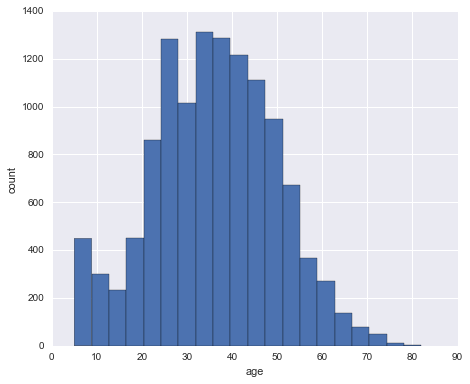

In [4]:
# get age of participants and plot its distribution
plt.subplot(1,2,1)
plt.hist(age,bins=20)
plt.gca().set_xlabel('age')
plt.gca().set_ylabel('count')
plt.gcf().set_size_inches(16,6)

Now compare the age distribution for women and men:

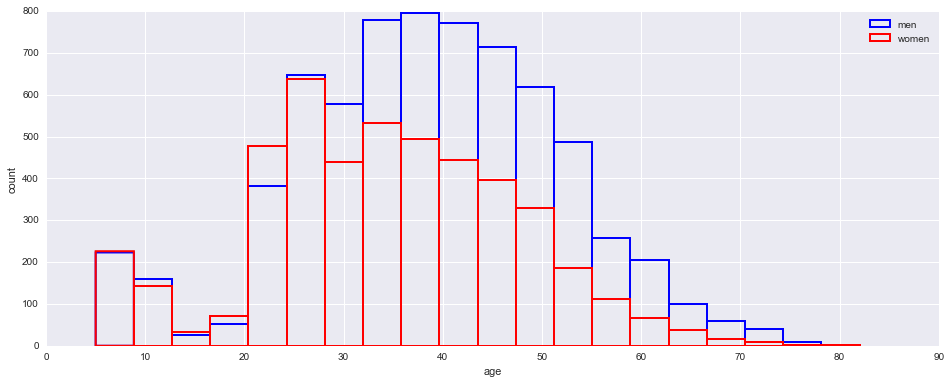

In [5]:
age_women = 2016 - data[data.sex=='F'].an.astype(int)
age_men = 2016 - data[data.sex=='M'].an.astype(int)
plt.hist(age_men,edgecolor='blue',fill=False,linewidth=2,label='men',bins=20)
plt.hist(age_women,edgecolor='red',fill=False,linewidth=2,label='women',bins=20)
plt.xlabel('age')
plt.ylabel('count')
plt.gca().set_xlim([0,90])
plt.gcf().set_size_inches(16,6)
plt.legend()

Clean data from 'False' (walk, kids running):

In [6]:
del data['Unnamed: 0']
data = data[data.cat != 'False']

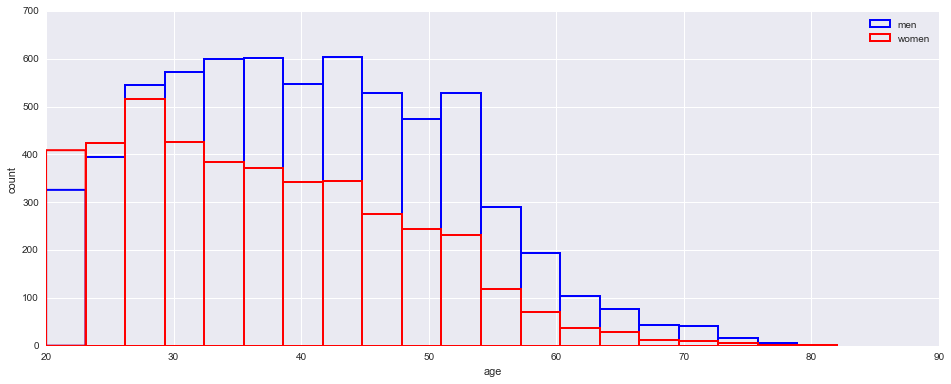

In [7]:
age_women = 2016 - data[data.sex=='F'].an.astype(int)
age_men = 2016 - data[data.sex=='M'].an.astype(int)
plt.hist(age_men,edgecolor='blue',fill=False,linewidth=2,label='men',bins=20)
plt.hist(age_women,edgecolor='red',fill=False,linewidth=2,label='women',bins=20)
plt.xlabel('age')
plt.ylabel('count')
plt.gca().set_xlim([20,90])
plt.gcf().set_size_inches(16,6)
plt.legend()

Sex-based statistical tests by category:

In [9]:
from scipy import stats
ks_stats = []
ks_pvalues = []
kw_stats = []
kw_pvalues = []
kstest = stats.ks_2samp(2016-data[data.sex=='M'].an.astype(int),2016-data[data.sex=='F'].an.astype(int))
ks_stats.append(kstest[0])
ks_pvalues.append(kstest[1])
kwtest = stats.mstats.kruskalwallis(2016-data[data.sex=='M'].an.astype(int),2016-data[data.sex=='F'].an.astype(int))
kw_stats.append(kwtest[0])
kw_pvalues.append(kwtest[1])

for i in ['10','21','42']:
    subdata = data[data.cat==i]
    kstest = stats.ks_2samp(2016-subdata[subdata.sex=='M'].an.astype(int),2016-subdata[subdata.sex=='F'].an.astype(int))
    ks_stats.append(kstest[0])
    ks_pvalues.append(kstest[1])
    kwtest = stats.mstats.kruskalwallis(2016-subdata[subdata.sex=='M'].an.astype(int),2016-subdata[subdata.sex=='F'].an.astype(int))
    kw_stats.append(kwtest[0])
    kw_pvalues.append(kwtest[1])

test = {'KS stat' : pd.Series(ks_stats), 'KS p-value' : pd.Series(ks_pvalues), 'category' : pd.Series(['global','10','21','42']), 'KW stat' : pd.Series(kw_stats), 'KW p-value' : pd.Series(kw_pvalues)}
test_result = pd.DataFrame(test)
test_result = test_result.set_index('category')
test_result

,KS p-value,KS stat,KW p-value,KW stat
category,,,,
global,1.010906e-40,0.134037,6.411120e-62,275.726303
10,3.487088e-23,0.142575,3.143475e-35,153.392881
21,2.448399e-08,0.096879,1.339886e-11,45.755268
42,8.376947e-04,0.144672,6.268202e-05,16.019844


In [10]:
data.lieu.value_counts().index

Index(['Lausanne', 'Genève', 'Pully', 'Epalinges', 'Morges', 'Vevey', 'Zürich',
       'Le Mont-sur-Lausanne', 'Nyon', 'Ecublens VD',
       ...
       'Bonaduz', 'F-Villemomble', 'B-Neupré', 'F-Eysines', 'F-Carrouge VD',
       'I-Canegrate (MI)', 'F-Cuvat', 'F-Jonzier Epagny', 'F-Metz',
       'Rehetobel'],
      dtype='object', length=1990)

In [11]:
cities = pd.read_excel('SwissCities.xlsx')

In [12]:
cities = cities.drop(cities.index[[0,1]])

,Name,Adm.,Population,Population.1,Population.2,Population.3,Population.4
2,Aarau,AG,18.082,18.872,18.122,19.497,20.71
3,Adliswil,ZH,16.418,15.776,15.822,16.502,18.605
4,Aesch,BL,7.954,9.56,9.735,10.219,10.173
5,Affoltern am Albis,ZH,8.064,9.461,10.314,11.091,11.708
6,Aigle,VD,6.233,7.825,7.955,9.255,9.942
7,Allschwil,BL,17.952,18.802,18.131,19.314,20.464
8,Altdorf,UR,8.23,8.282,8.541,8.861,9.203
9,Altstätten,SG,9.26,10.249,10.381,10.819,11.358
10,Amriswil,TG,9.013,10.426,11.357,12.243,13.113
11,Appenzell,AI,4.781,5.194,5.447,5.712,5.822


In [13]:
cities['Population']=cities['Population']*1000
cities['Population.1']=cities['Population.1']*1000
cities['Population.2']=cities['Population.2']*1000
cities['Population.3']=cities['Population.3']*1000
cities['Population.4']=cities['Population.4']*1000
cities['population']=cities['Population.4']
del cities['Population']
del cities['Population.1']
del cities['Population.2']
del cities['Population.3']
del cities['Population.4']

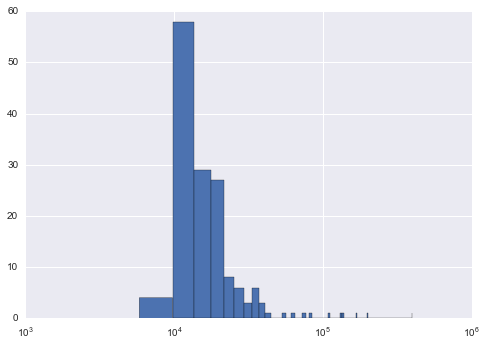

In [39]:
plt.hist(cities.population,bins=100)
plt.gca().set_xscale('log')

In [47]:
# try to map each city in 'lieu' with this dataset
mapped = []
for city in data.lieu:
    flag = cities.Name == city
    mapped.append(flag.value_counts()[False]==len(flag)-1)

[False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 F

In [51]:
summed = 0
for l in mapped:
    summed += l==True
summed/len(mapped)

0.33600071130079134